# Importance Sampling
## Estimate Expectations from a Different Distribution


[Followed Jereme Zhang's Article](https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744)

## What is importance sampling?

Consider a scenario you are trying to calculate an expectation of function $f(x)$, where $x\sim p(x)$, subjected to some distribution. We have the following estimation of $\mathbb{E}[f(x)]$:

$$ \mathbb{E}[f(x)] = \int f(x)p(x)dx \approx \dfrac{1}{n} \sum_{i} f(x_i) $$

The Monte Carlo sampling method is to simply sample $x$ from the distribution $p(x)$ and take the average of all samples to get an estimation of the expectation. Then here comes the problem, what if $p(x)$ is very hard to sample from? Are we able to estimate the expectation based on some known and easily sampled distribution?

The answer is yes. And it comes from a simple transformation of the formula:

$$ \mathbb{E}[f(x)] = \int f(x)p(x)dx = \int f(x) \dfrac{p(x)}{q(x)}q(x)dx \approx \dfrac{1}{n} \sum_{i} f(x_i) \dfrac{p(x_i)}{q(x_i)} $$

where x is sampled from distribution $q(x)$ and $q(x)$ should not be 0. By this way, estimating the expectation is able to sample from another distribution $q(x)$, and $\dfrac{p(x)}{q(x)}$ is called the sampling ratio or sampling weight, which acts as a correction weight to offset the probability sampling from a different distribution.

Another thing we need to talk about is the variance of estimation:

$$Var(X) = \mathbb{E}[X^2]-\mathbb{E}[X]^2$$

where in this case, $x$ is $f(x)\dfrac{p(x)}{q(x)}$, so if $\dfrac{p(x)}{q(x)}$ is large, this will result in large variance, which we definitely hope to avoid. On the other hand, it is also possible to select proper $q(x)$ that results in even smaller variance.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

Let's define function $f(x)$ and the sample distribution. 

In [3]:
def f_x(x):
    return 1/(1+np.exp(-x))

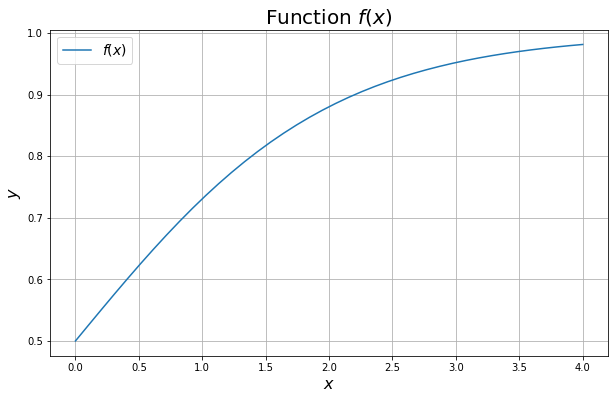

In [147]:
x = np.linspace(0,4,40)
y = f_x(x)
plt.plot(x,y,label="$f(x)$")
plt.title("Function $f(x)$",fontsize=20)
plt.xlabel("$x$",fontsize=16)
plt.ylabel("$y$",fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.gcf().set_size_inches(10,6)
plt.show()

Now let's define the distribution of $p(x)$ and $q(x)$:

In [16]:
def distribution(mu=0,sigma=1):
    # return probability given a value
    distribution = norm(mu,sigma)
    return distribution

For simplicity reasons, here both $p(x)$ and $q(x)$ are normal distributions, later we'll try to define some $p(x)$ that are very hard to sample from. In our first demonstration, let's set two distributions close to each other with similar $\mu_{target}=3.5$ and $\mu_{appro}=3$ and both with $\sigma=1$

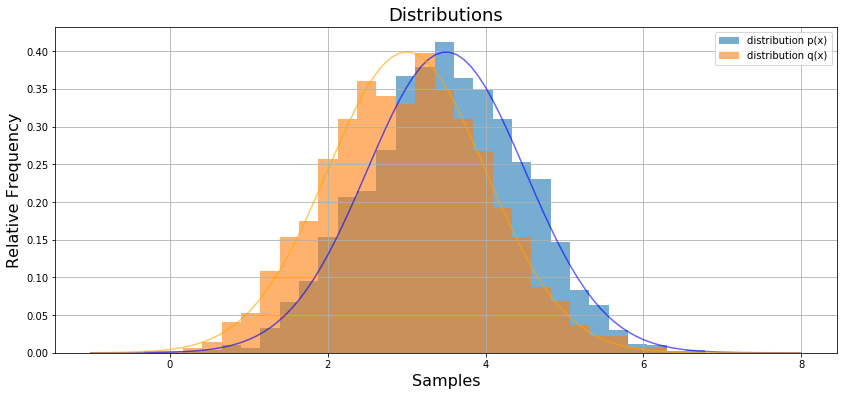

In [200]:
# hyperparameters
n = 2000           # num of samples
mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

# Create the probability distributions
p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

# Sample n observations from the distributions
p_data = np.random.normal(mu_target,sigma_target,n)   #  mean, st dev, number of values
q_data = np.random.normal(mu_appro,sigma_appro,n)     #  mean, st dev, number of values

# Find the max and min values from both distributions
x_max = max(max(p_data),max(q_data))
x_min = min(min(p_data),min(q_data))

# Generate some points to plot the pdf of the distributions
x = np.linspace(-1,8,100)
py = p_x.pdf(x)       
qy = q_x.pdf(x)       

# Plot some histograms
plt.hist(p_data,
         density=1,
         alpha=0.6,
         bins=np.linspace(x_min,x_max,30),
         label="distribution p(x)")

plt.hist(q_data,
         density=1,
         alpha=0.6,
         bins=np.linspace(x_min,x_max,30),
         label="distribution q(x)")

# Plot the pdfs
plt.plot(x,py,color='blue',alpha=0.6)
plt.plot(x,qy,color='orange',alpha=0.6)

# Fig stuff
plt.title("Distributions",fontsize=18)
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Relative Frequency",fontsize=16)
plt.grid()
plt.legend()
plt.gcf().set_size_inches(14,6)

Now we are able to compute the true value sampled from distribution $p(x)$

In [189]:
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)

print(f"Expectation: {s/n:0.3f}")

Simulate Value: 0.954


We got an estimation of 0.954. Now let's sample from $q(x)$ and see how it performs:

In [193]:
value_list = []
for i in range(n):
    # sample from a different distribution
    x_i = np.random.normal(mu_appro,sigma_appro)
    value = f_x(x_i) *(p_x.pdf(x_i) / q_x.pdf(x_i) )
    
    value_list.append(value)
    
print(f"Estimated Expectation: {np.mean(value_list):0.3f}, Variance: {np.var(value_list):0.3f}")

Estimated Expectation: 0.952, Variance: 0.300


Notice that here $x_i$ is sampled from approxmiate distribution $q(x)$, and we get an estimated expectation of 0.952 and variance 0.300. So we were able to get a really good estimation using a different distribution.

### Comparison

The distribution $q(x)$ might be too similar to $p(x)$ so let's try another distribution.

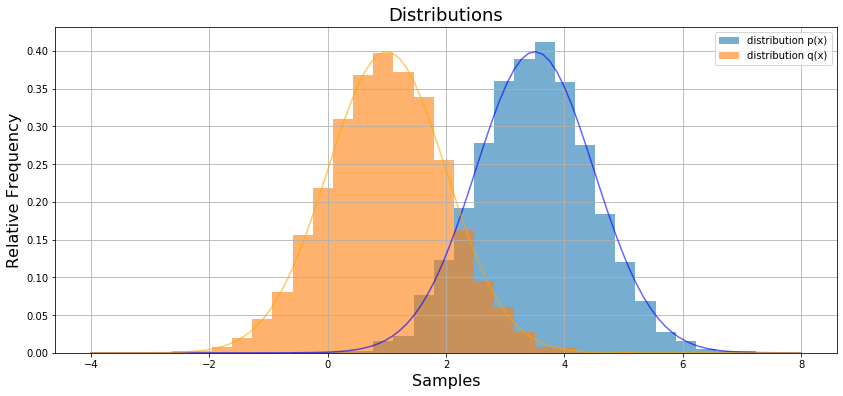

In [203]:
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

# Sample n observations from the distributions
p_data = np.random.normal(mu_target,sigma_target,n)   #  mean, st dev, number of values
q_data = np.random.normal(mu_appro,sigma_appro,n)     #  mean, st dev, number of values

# Find the max and min values from both distributions
x_max = max(max(p_data),max(q_data))
x_min = min(min(p_data),min(q_data))

# Generate some points to plot the pdf of the distributions
x = np.linspace(-4,8,100)
py = p_x.pdf(x)       
qy = q_x.pdf(x)       

# Plot some histograms
plt.hist(p_data,
         density=1,
         alpha=0.6,
         bins=np.linspace(x_min,x_max,30),
         label="distribution p(x)")

plt.hist(q_data,
         density=1,
         alpha=0.6,
         bins=np.linspace(x_min,x_max,30),
         label="distribution q(x)")

# Plot the pdfs
plt.plot(x,py,color='blue',alpha=0.6)
plt.plot(x,qy,color='orange',alpha=0.6)

# Fig stuff
plt.title("Distributions",fontsize=18)
plt.xlabel("Samples",fontsize=16)
plt.ylabel("Relative Frequency",fontsize=16)
plt.grid()
plt.legend()
plt.gcf().set_size_inches(14,6)

In [204]:
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)

print(f"Simulate Value: {s/n:0.3f}")

Simulate Value: 0.956


In [211]:
value_list = []
for i in range(n):
    # sample from a different distribution
    x_i = np.random.normal(mu_appro,sigma_appro)
    value = f_x(x_i) *(p_x.pdf(x_i) / q_x.pdf(x_i) )
    
    value_list.append(value)
    
print(f"Estimated Expectation: {np.mean(value_list):0.3f}, Variance: {np.var(value_list):0.3f}")

Estimated Expectation: 0.905, Variance: 58.544


Here we set $n$ to 5000, when distribution is dissimilar, in general we need more samples to approximate the value. This time we get an estimation of value 0.905, but variance is 58.544.

The reason comes from the sample ratio, $\dfrac{p(x)}{q(x)}$ as two distributions are too different from each other could result in huge difference of this value; thus, the variance is increased. The rule of thumb is to define $q(x)$ where $p(x)|f(x)|$ is large.